        FCF  FCFE  Interest_expenses  Dividends & Share_repurchase
Year                                                              
2020  13.05  14.0                1.5                           1.5
2021  21.75  24.0                2.5                           3.0
2022  27.45  31.0                3.5                           4.5
2023  33.15  38.0                4.5                           6.0
2024  38.85  45.0                5.5                           7.5
      Interest Coverage  Dividend Coverage
Year                                      
2020               8.70               9.33
2021               8.70               8.00
2022               7.84               6.89
2023               7.37               6.33
2024               7.06               6.00


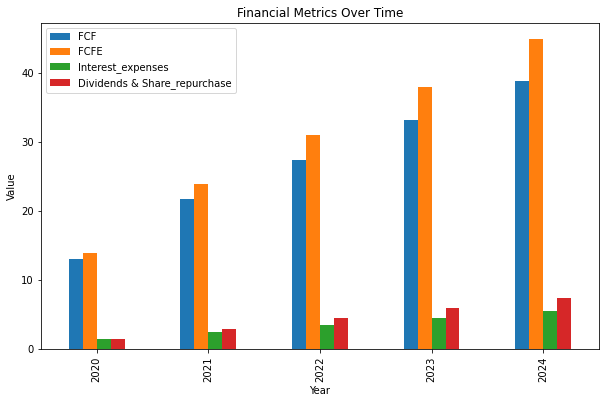

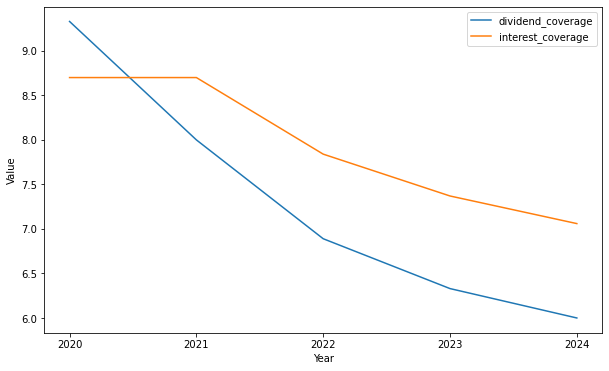

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


years = [2020, 2021, 2022, 2023, 2024]
tax_rate = 0.3
net_income = [10, 15, 20, 25, 30]
depr = [3, 4, 5, 6, 7]
int_exp = [1.5, 2.5, 3.5, 4.5, 5.5]
inventory = [1, 2, 3, 4, 5]
acc_pay = [1, 2, 3, 4, 5]
acc_rec = [1, 2, 3, 4, 5]
capex = [1, 2, 3, 4, 5]
borrowings = [2, 4, 6, 8, 10]
dividends =[1,2,3,4,5]
share_repurchase = [0.5, 1, 1.5, 2, 2.5]

def free_cash_flow_to_firm():
    cash_per_year = []
    inv_prev = inventory[0]
    acc_p_prev = acc_pay[0]
    acc_r_prev = acc_rec[0]
    for ni, de, inter, inv, acp, acr, cpx in zip(net_income, depr, int_exp, inventory, acc_pay, acc_rec, capex):
        cash = ni + de + inter * (1 - tax_rate) + (inv - inv_prev) + (acp - acc_p_prev) + (acr - acc_r_prev) - cpx
        inv_prev = inv
        acc_p_prev = acp
        acc_r_prev = acr
        cash_per_year.append(cash)
    return cash_per_year

result = free_cash_flow_to_firm()


def free_cash_flow_to_equity(free_cash_flow_to_firm):
    cash_p_year = [] 
    for i in range(len(free_cash_flow_to_firm)):
        cash_f = free_cash_flow_to_firm[i] - int_exp [i] * (1 - tax_rate) + borrowings [i]
        cash_p_year.append(cash_f)
    return cash_p_year 

result2 = free_cash_flow_to_equity(result)


def interest_coverage(free_cash_flow_to_firm):
    coverage = []
    for i in range(len(free_cash_flow_to_firm)):
        divide = free_cash_flow_to_firm[i] / int_exp[i]
        coverage.append(divide)
    return coverage

result3 = interest_coverage(result)

def dividend_coverage(free_cash_flow_to_equity):
    coverage = []
    for i in range(len(free_cash_flow_to_equity)):
        divide = free_cash_flow_to_equity[i]/ (dividends[i] + share_repurchase[i])
        coverage.append(divide)
    return coverage

result4 = dividend_coverage(result2)




# Pandas Table for FCF & FCFE
table = pd.DataFrame({"Year": years, "FCF": result, "FCFE": result2, "Interest_expenses": int_exp, "Dividends & Share_repurchase": [d + s for d, s in zip(dividends, share_repurchase)]})
table.set_index("Year", inplace=True)
#Pandas Table for Interest and Dividens coverages 
table_1 = pd.DataFrame({"Year": years, "Interest Coverage": result3, "Dividend Coverage": result4})
table_1.set_index("Year", inplace=True)
table_1["Interest Coverage"] = table_1["Interest Coverage"].round(2)
table_1["Dividend Coverage"] = table_1["Dividend Coverage"].round(2)

print(table)
print(table_1)

# FCF, FCFE Visualization
table.plot(kind = "bar", figsize=(10, 6))
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Financial Metrics Over Time")
plt.legend()
plt.show()

# Dividends and Interest_coverages 
plt.figure(figsize=(10, 6))
plt.plot(table_1["Dividend Coverage"], label="dividend_coverage")
plt.plot(table_1["Interest Coverage"], label="interest_coverage")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.xticks(years)
plt.show()